### Model Training

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings

In [2]:
# import the data
df = pd.read_csv('stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X = df.drop(columns=['math_score'], axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [5]:
# gender
print('Categories in gender variable: ', X['gender'].unique())

# race_ethnicity
print('Categories in race_ethnicity variable: ', X['race_ethnicity'].unique())

# parental_level_of_education
print('Categories in parental_level_of_education variable: ', X['parental_level_of_education'].unique())

# lunch
print('Categories in lunch variable: ', X['lunch'].unique())

# test_preparation_course
print('Categories in test_preparation_course variable: ', X['test_preparation_course'].unique())

Categories in gender variable:  ['female' 'male']
Categories in race_ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:  ['standard' 'free/reduced']
Categories in test_preparation_course variable:  ['none' 'completed']


In [6]:
y = df['math_score']

In [7]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [8]:
numerical_features = X.select_dtypes(exclude='object').columns
categorical_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    [('StandardScaler', StandardScaler(), numerical_features),
    ('OneHotEncoder', OneHotEncoder(), categorical_features)]
)

In [9]:
X.shape

(1000, 7)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(1000, 19)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((800, 19), (200, 19))

In [13]:
def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    r2 = r2_score(actual, predicted)
    return mae, rmse, r2

In [14]:
models = {
    'Linear Regression':LinearRegression(),
    'DecisionTree Regressor':DecisionTreeRegressor(),
    'RandomForest Regressor':RandomForestRegressor(),
    'AdaBoost Regressor':AdaBoostRegressor(),
    'GradientBoosting Regressor':GradientBoostingRegressor(),
    'KNeighbors Regressor':KNeighborsRegressor(),
    'XGB Regressor':XGBRegressor(),
    'Catboost Regressor':CatBoostRegressor(verbose=False)
}

model_list = []
r2_score_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2_score = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2_score = evaluate_model(y_test, y_test_pred)

    model_list.append(list(models.keys())[i])

    print(list(models.keys())[i])
    print('Model performance for training set')
    print('-> Mean absolute error: {:0.4f}'.format(model_train_mae))
    print('-> Root mean square error: {:0.4f}'.format(model_train_rmse))
    print('-> R2 score: {:0.4f}'.format(model_train_r2_score))
    print('-'*50)

    print('Model performance for test set')
    print('-> Mean absolute error: {:0.4f}'.format(model_test_mae))
    print('-> Root mean square error: {:0.4f}'.format(model_test_rmse))
    print('-> R2 score: {:0.4f}'.format(model_test_r2_score))
    print('='*50)
    print()

    r2_score_list.append(model_test_r2_score)

Linear Regression
Model performance for training set
-> Mean absolute error: 4.2667
-> Root mean square error: 5.3231
-> R2 score: 0.8743
--------------------------------------------------
Model performance for test set
-> Mean absolute error: 4.2148
-> Root mean square error: 5.3940
-> R2 score: 0.8804

DecisionTree Regressor
Model performance for training set
-> Mean absolute error: 0.0187
-> Root mean square error: 0.2795
-> R2 score: 0.9997
--------------------------------------------------
Model performance for test set
-> Mean absolute error: 6.4250
-> Root mean square error: 8.0756
-> R2 score: 0.7320

RandomForest Regressor
Model performance for training set
-> Mean absolute error: 1.8273
-> Root mean square error: 2.2882
-> R2 score: 0.9768
--------------------------------------------------
Model performance for test set
-> Mean absolute error: 4.6319
-> Root mean square error: 5.9834
-> R2 score: 0.8529

AdaBoost Regressor
Model performance for training set
-> Mean absolute e

In [15]:
pd.DataFrame(list(zip(model_list, r2_score_list)), columns=['Model name', 'R2_score']).sort_values(by=['R2_score'], ascending=False)

,Model name,R2_score
0,Linear Regression,0.880433
4,GradientBoosting Regressor,0.872021
2,RandomForest Regressor,0.852874
7,Catboost Regressor,0.851632
3,AdaBoost Regressor,0.847748
6,XGB Regressor,0.821220
5,KNeighbors Regressor,0.783770
1,DecisionTree Regressor,0.731999


Linear Regression

In [16]:
best_model = LinearRegression()
best_model = best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)*100
print("Accuracy: {:0.2f} %".format(r2))

Accuracy: 88.04 %


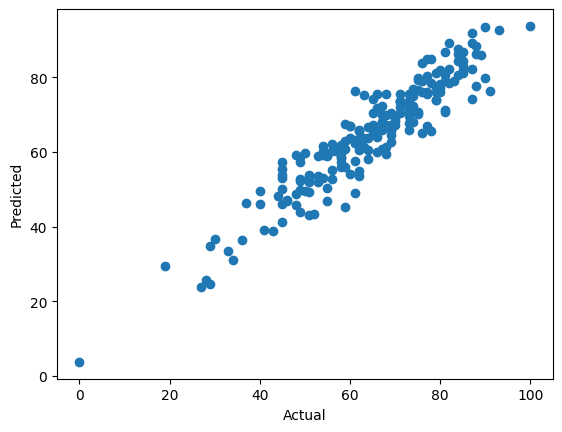

In [17]:
# scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

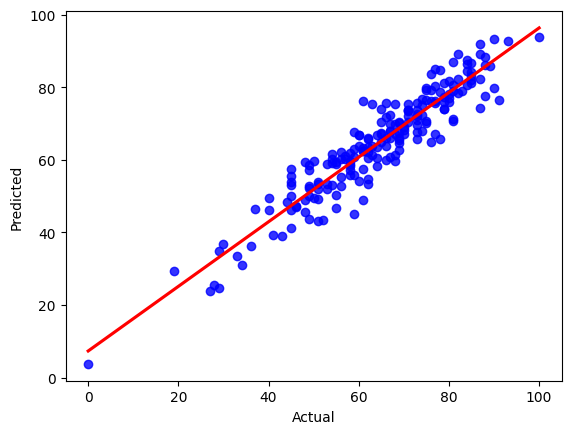

In [18]:
# regression plot
sns_reg = sns.regplot(x=y_test, y=y_pred, ci=None, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}) # ci - confidence interval

sns_reg.set_xlabel('Actual')
sns_reg.set_ylabel('Predicted')
plt.show()